<a href="https://colab.research.google.com/github/SergeyHSE/UnsupervisedLearning.github.io/blob/main/UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we will use different algorithms of the "Unsupervised Learning" method on the classification data of plant leaves, as well as on the data from sklearn library.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
from google.colab import files
file = files.upload()

Saving data_Mar_64.txt to data_Mar_64.txt


In [3]:
data = pd.read_csv('/content/data_Mar_64.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,0.015625,0.015625,0.015625,0.025391,0.000000,0.015625,0.0,0.025391,0.027344,0.033203,0.009766,0.025391,0.001953,0.0,0.003906,0.001953,0.044922,0.000000,0.031250,0.033203,0.015625,0.003906,0.000000,0.013672,0.001953,0.015625,0.015625,0.017578,0.033203,0.015625,0.003906,0.003906,0.031250,0.035156,0.015625,0.044922,0.007812,0.029297,0.037109,0.000000,0.027344,0.005859,0.001953,0.041016,0.000000,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,0.021484,0.007812,0.003906,0.013672,0.003906,0.009766,0.0,0.044922,0.011719,0.007812,0.031250,0.017578,0.001953,0.0,0.001953,0.001953,0.037109,0.000000,0.029297,0.025391,0.039062,0.003906,0.000000,0.035156,0.000000,0.027344,0.015625,0.019531,0.029297,0.023438,0.005859,0.003906,0.017578,0.025391,0.011719,0.025391,0.005859,0.035156,0.033203,0.000000,0.015625,0.011719,0.003906,0.037109,0.001953,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,0.019531,0.017578,0.005859,0.009766,0.005859,0.015625,0.0,0.027344,0.017578,0.019531,0.019531,0.023438,0.001953,0.0,0.011719,0.001953,0.042969,0.000000,0.011719,0.023438,0.035156,0.001953,0.001953,0.027344,0.000000,0.003906,0.017578,0.027344,0.033203,0.007812,0.001953,0.007812,0.035156,0.015625,0.011719,0.027344,0.003906,0.011719,0.019531,0.001953,0.013672,0.005859,0.007812,0.068359,0.003906,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,0.027344,0.021484,0.009766,0.013672,0.001953,0.013672,0.0,0.021484,0.017578,0.011719,0.027344,0.009766,0.003906,0.0,0.011719,0.000000,0.050781,0.001953,0.019531,0.013672,0.011719,0.003906,0.000000,0.027344,0.000000,0.013672,0.007812,0.017578,0.035156,0.021484,0.000000,0.003906,0.035156,0.027344,0.015625,0.029297,0.007812,0.011719,0.023438,0.000000,0.017578,0.009766,0.007812,0.052734,0.003906,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,0.017578,0.039062,0.007812,0.042969,0.001953,0.007812,0.0,0.017578,0.027344,0.025391,0.003906,0.019531,0.003906,0.0,0.009766,0.003906,0.017578,0.001953,0.009766,0.031250,0.015625,0.001953,0.001953,0.037109,0.000000,0.011719,0.037109,0.015625,0.039062,0.009766,0.001953,0.000000,0.050781,0.023438,0.005859,0.058594,0.003906,0.015625,0.021484,0.001953,0.015625,0.023438,0.005859,0.027344,0.000000,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


In [4]:
#The first column is the answer, let's put it in a separate variable

X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

The target variable takes a text value.
Use the Lame Encoder from sklearn to encode the text variable y_name
and save the resulting values to the variable y


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_name)
y = le.transform(y_name)

y.shape, X.shape

((1600,), (1600, 64))

In [6]:
unique, value_counts = np.unique(y, return_counts=True)
concat_counts = pd.DataFrame({'unique' : unique, 'counts' : value_counts})
concat_counts
num_rows = 16*15
num_rows

240

In [7]:
X = X[:240, :]
X.shape
y = y[:240]
y.shape

(240,)

Select objects that correspond to values from 0 to 14 of the target variable y. Draw the selected objects in a two-dimensional feature space using the scatter method from matplotlib.pyplot. To display objects of different classes in different colors, pass c = y[y<15] to the scatter method.

Using the PCA method, reduce the dimension of the feature space to two.

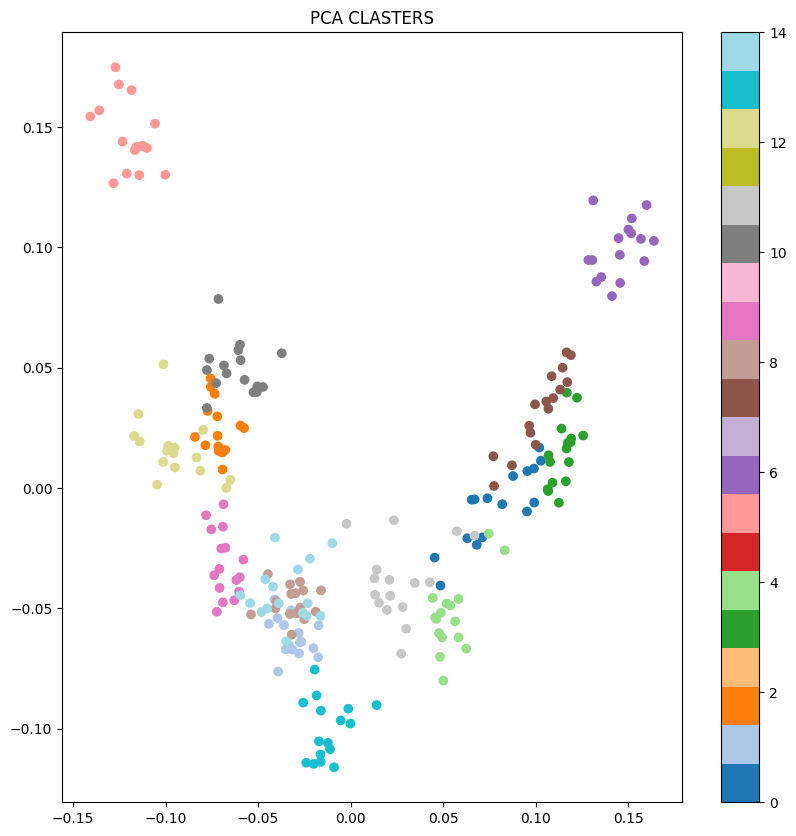

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca_fit = pca.fit_transform(X)

plt.figure(figsize=(10, 10), dpi=100)
plt.scatter(pca_fit[:, 0], pca_fit[:, 1], c=y[y<15], cmap='tab20')
plt.colorbar()
plt.title('PCA CLASTERS')
plt.show()


In [ ]:
pca_fit[0]

array([ 0.06541615, -0.00483429])

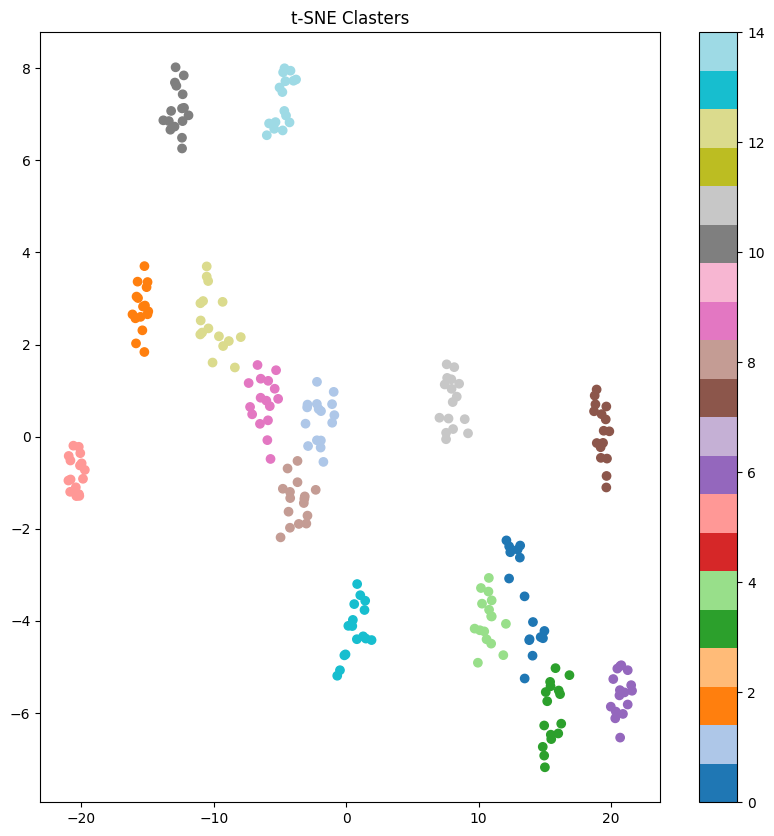

In [ ]:
#we are gonna make the same operations by TNSE

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_fit = tsne.fit_transform(X)

plt.figure(figsize=(10, 10), dpi=100)
plt.scatter(tsne_fit[:, 0], tsne_fit[:, 1], c=y[y<15], cmap='tab20')
plt.title('t-SNE Clasters')
plt.colorbar()
plt.show()

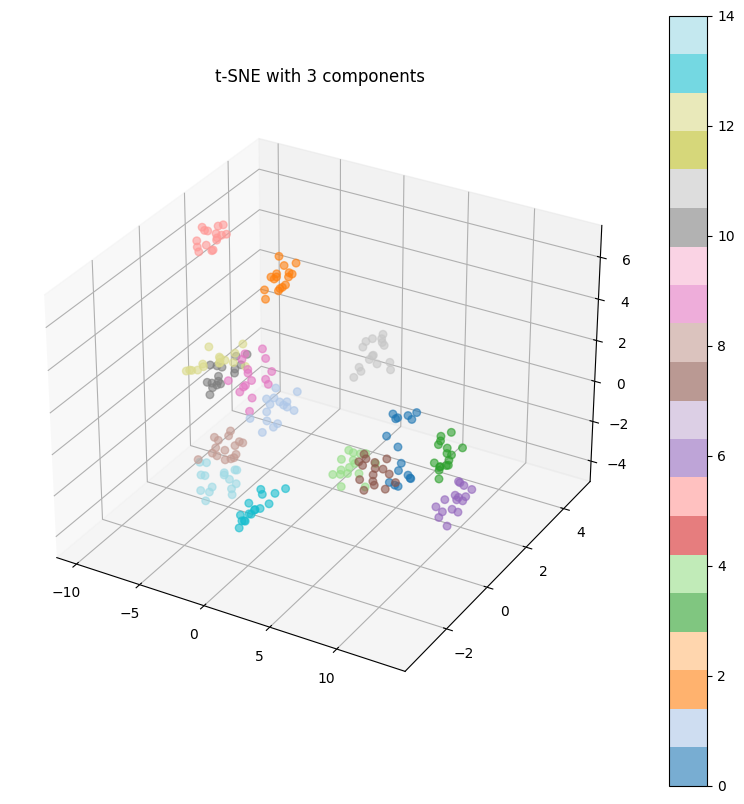

In [ ]:
#On this figure we see more distance between clasters

tsne_fit[0]

tsne3 = TSNE(n_components=3, random_state=0)
tsne_fit = tsne3.fit_transform(X)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(111, projection='3d')
colormap = plt.get_cmap('tab20')
scatter = ax.scatter(tsne_fit[:, 0], tsne_fit[:, 1], tsne_fit[:, 2], c=y, cmap=colormap, s=30, alpha=0.6)
cbar = plt.colorbar(scatter)
plt.title('t-SNE with 3 components')
plt.show()

Write class for K-means and realize it

In [8]:
from sklearn.metrics import pairwise_distances_argmin

class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100):
        self.n_clusters = n_clusters
        self.n_iters = n_iters

    def fit(self, X):
        count = 0
        np.random.seed(0)
        self.centers = np.random.uniform(low=X.min(axis=0),
                                         high=X.max(axis=0),
                                         size=(self.n_clusters, X.shape[1]))

        for it in range(self.n_iters):
            count += 1
            labels = pairwise_distances_argmin(X, self.centers)
            new_centers = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

            if np.all(self.centers == new_centers):
                break

            self.centers = new_centers
        print(count)

    def predict(self, X):
        labels = pairwise_distances_argmin(X, self.centers)
        return labels

In [9]:
#Import dataset

from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 3.0, 0.5],
                             random_state=0)
X, y = noisy_blobs

In [10]:
#Cluster noisy_blobs objects using MyKMeans, use hyperparameters n_clusters=3, n_iters=100.

kmeans1 = MyKMeans()
kmeans_fit1 = kmeans1.fit(X)
kmean_pred1 = kmeans1.predict(X)

kmean_pred1[1]

11


0

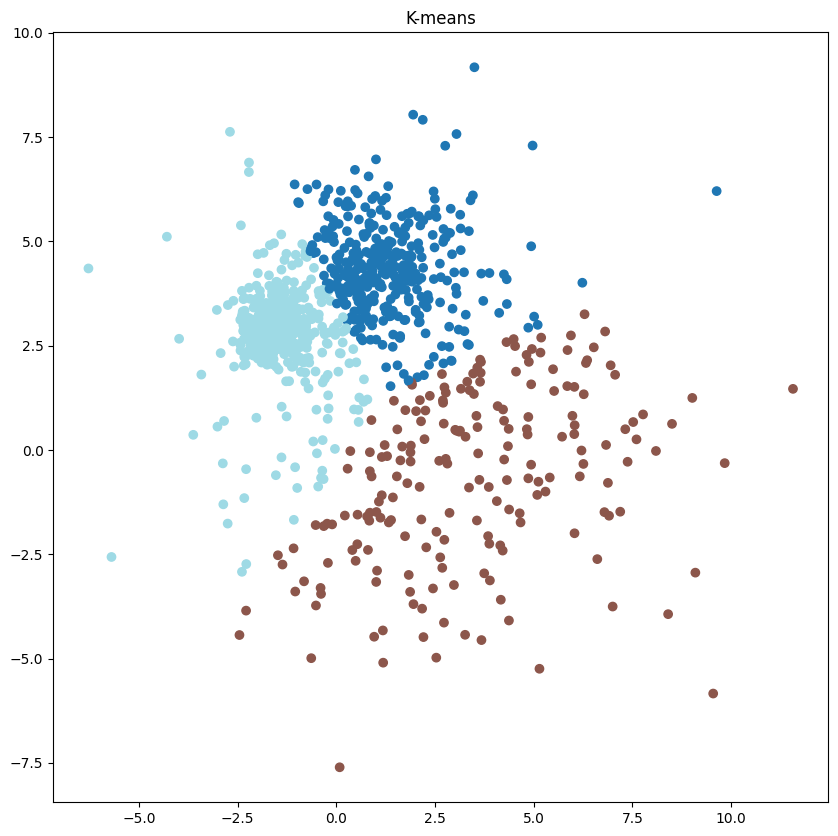

In [11]:
plt.figure(figsize=(10, 10), dpi=100)
plt.scatter(X[:, 0], X[:, 1], c=kmean_pred1, cmap='tab20')
plt.title('K-means')
plt.show()

In [12]:
#Cluster noisy_blobs objects, use hyperparameters n_clusters=3, n_items = 5.

kmeans = MyKMeans(n_iters=5)
kmeans_fit = kmeans.fit(X)
kmean_pred = kmeans.predict(X)
kmean_pred[1]

5


0

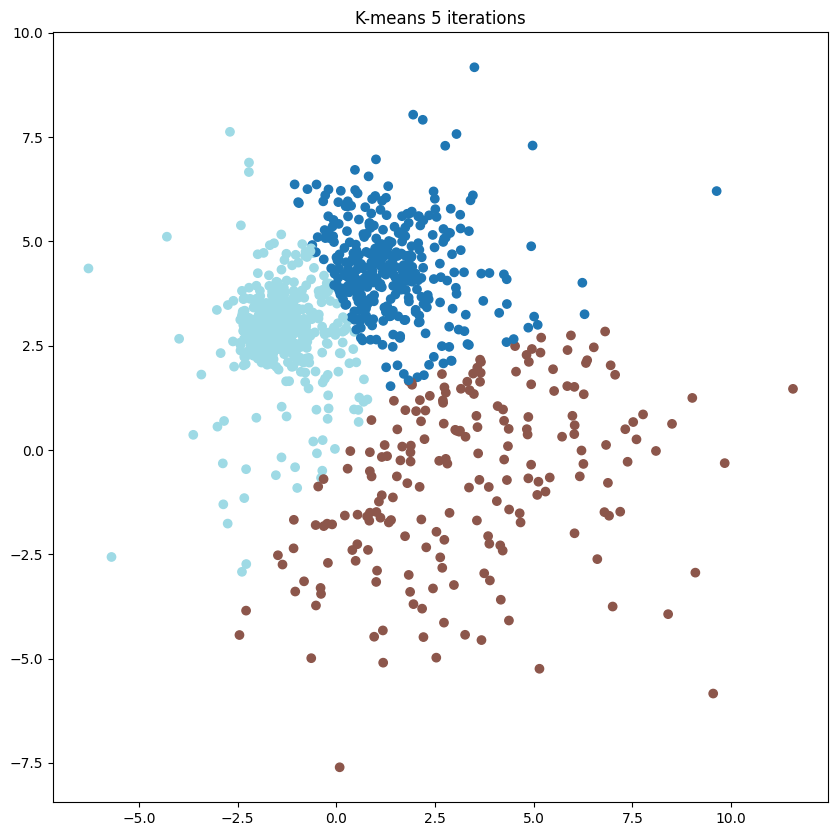

In [13]:
plt.figure(figsize=(10, 10), dpi=100)
plt.scatter(X[:, 0], X[:, 1], c=kmean_pred, cmap='tab20')
plt.title('K-means 5 iterations')
plt.show()